In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('AirPrice.csv')
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [3]:
df.shape

(10683, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Observation: we can see we have all object columns except output column which needs to be first converted into numeric after removing Null values

# EDA

# checking null values with graph

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

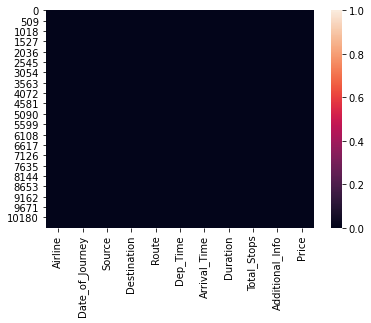

In [6]:
sns.heatmap(df.isnull())

Updating Null Values with fillna

In [7]:
df['Route']=df['Route'].fillna(df['Route'].mode()[0])
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Null values are removed

# Checking Distinct Data in columns

we will check for columns which is having object as data type

In [9]:
df.dtypes.sort_values(ascending=False)

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


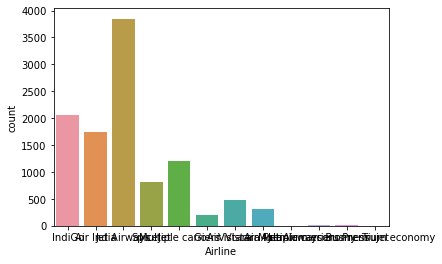

In [10]:
import seaborn as sns
ax=sns.countplot(x="Airline",data=df)
print(df["Airline"].value_counts())

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64


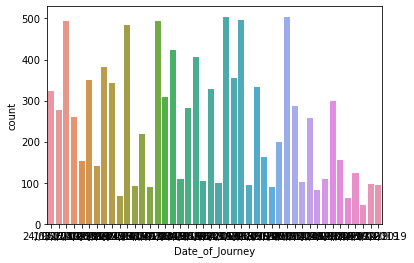

In [11]:
import seaborn as sns
ax=sns.countplot(x="Date_of_Journey",data=df)
print(df["Date_of_Journey"].value_counts())

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


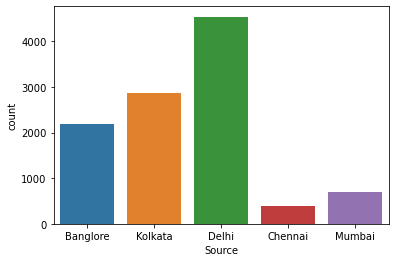

In [12]:
import seaborn as sns
ax=sns.countplot(x="Source",data=df)
print(df["Source"].value_counts())

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


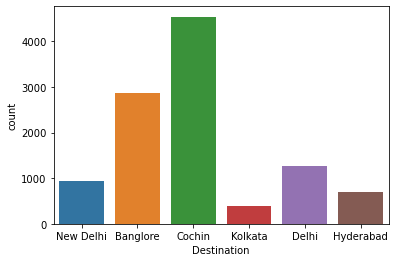

In [13]:
import seaborn as sns
ax=sns.countplot(x="Destination",data=df)
print(df["Destination"].value_counts())

DEL ? BOM ? COK          2377
BLR ? DEL                1552
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
BOM ? UDR ? DEL ? HYD       1
CCU ? IXB ? DEL ? BLR       1
BOM ? DED ? DEL ? HYD       1
CCU ? IXZ ? MAA ? BLR       1
BOM ? NDC ? HYD             1
Name: Route, Length: 128, dtype: int64


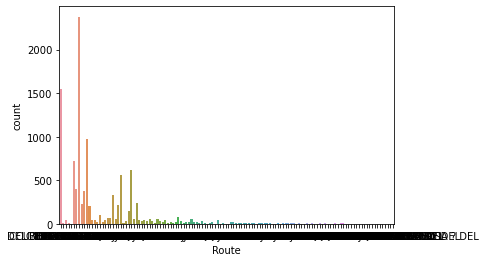

In [14]:
import seaborn as sns
ax=sns.countplot(x="Route",data=df)
print(df["Route"].value_counts())

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
22:25      1
04:50      1
12:45      1
03:00      1
04:15      1
Name: Dep_Time, Length: 222, dtype: int64


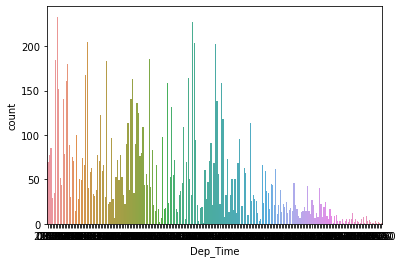

In [15]:
import seaborn as sns
ax=sns.countplot(x="Dep_Time",data=df)
print(df["Dep_Time"].value_counts())

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
22:40 07 May      1
11:05 10 May      1
18:30 25 May      1
22:55 02 Mar      1
00:50 13 May      1
Name: Arrival_Time, Length: 1343, dtype: int64


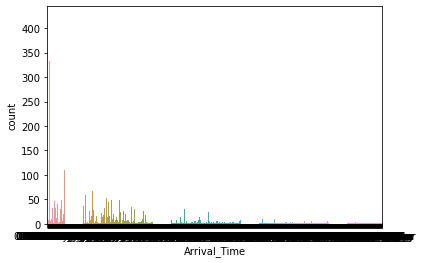

In [16]:
import seaborn as sns
ax=sns.countplot(x="Arrival_Time",data=df)
print(df["Arrival_Time"].value_counts())

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
28h 30m      1
47h 40m      1
42h 5m       1
41h 20m      1
19h 50m      1
Name: Duration, Length: 368, dtype: int64


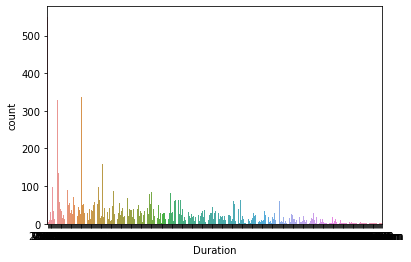

In [17]:
import seaborn as sns
ax=sns.countplot(x="Duration",data=df)
print(df["Duration"].value_counts())

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


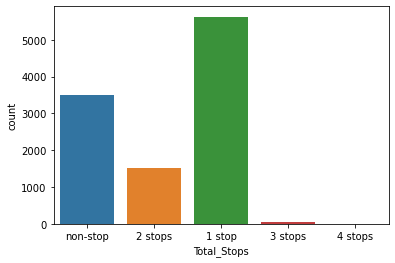

In [18]:
import seaborn as sns
ax=sns.countplot(x="Total_Stops",data=df)
print(df["Total_Stops"].value_counts())

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64


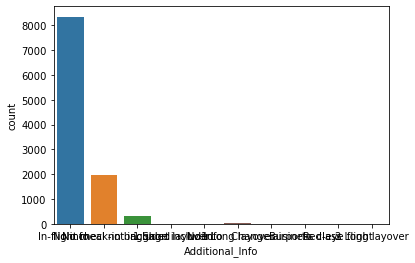

In [19]:
import seaborn as sns
ax=sns.countplot(x="Additional_Info",data=df)
print(df["Additional_Info"].value_counts())

# Data conversion using Label Encoder 

In [19]:
#by using for loop here we encoded the object columns
le =LabelEncoder()

list1=['Airline','Date_of_Journey','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [20]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,8,3897
1,1,6,3,0,84,31,906,336,1,8,7662
2,4,43,2,1,118,70,413,106,1,8,13882
3,3,10,3,0,91,164,1324,311,0,8,6218
4,3,0,0,5,29,149,1237,303,0,8,13302
5,8,27,3,0,64,66,830,235,4,8,3873
6,4,8,0,5,5,172,742,65,0,5,11087
7,4,0,0,5,5,55,463,145,0,8,22270
8,4,8,0,5,5,65,742,185,0,5,11087
9,6,30,2,1,104,91,1124,341,0,8,8625


Here we have converted onbject columns in Numeric 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  int32
 1   Date_of_Journey  10683 non-null  int32
 2   Source           10683 non-null  int32
 3   Destination      10683 non-null  int32
 4   Route            10683 non-null  int32
 5   Dep_Time         10683 non-null  int32
 6   Arrival_Time     10683 non-null  int32
 7   Duration         10683 non-null  int32
 8   Total_Stops      10683 non-null  int32
 9   Additional_Info  10683 non-null  int32
 10  Price            10683 non-null  int64
dtypes: int32(10), int64(1)
memory usage: 500.9 KB


# Describe the Data 

In [22]:
df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,23.735093,1.952261,1.436113,74.822896,107.980717,869.828419,194.069269,1.458111,7.393054,9087.064121
std,2.352155,12.337763,1.177221,1.474782,36.728405,61.085563,331.509504,108.620556,1.806290,1.214211,4611.359167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,48.000000,55.000000,603.000000,106.000000,0.000000,8.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,73.000000,96.000000,937.000000,233.000000,0.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,104.000000,164.000000,1141.000000,280.000000,4.000000,8.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,127.000000,221.000000,1342.000000,367.000000,4.000000,9.000000,79512.000000


Observation:

we can see the Data is deviated by looking at std dev which is getting more than +-1.

Comparison in Mean and 50%: Some of the column is having Mean value greater than 50% hence we can say that we have skewness prsent in Data which can be find by skew method and can be removed by Power transform or Boxcox method.

Comparison in 75% and Max: Here we can see some columns are having big diff within 75% and Max data hence we can say that outliers can be present which we can see by percentile and can be removed by Z score method.

If we have any irrelavant column by checking corelation so we can remove those columns


# Checking correlation

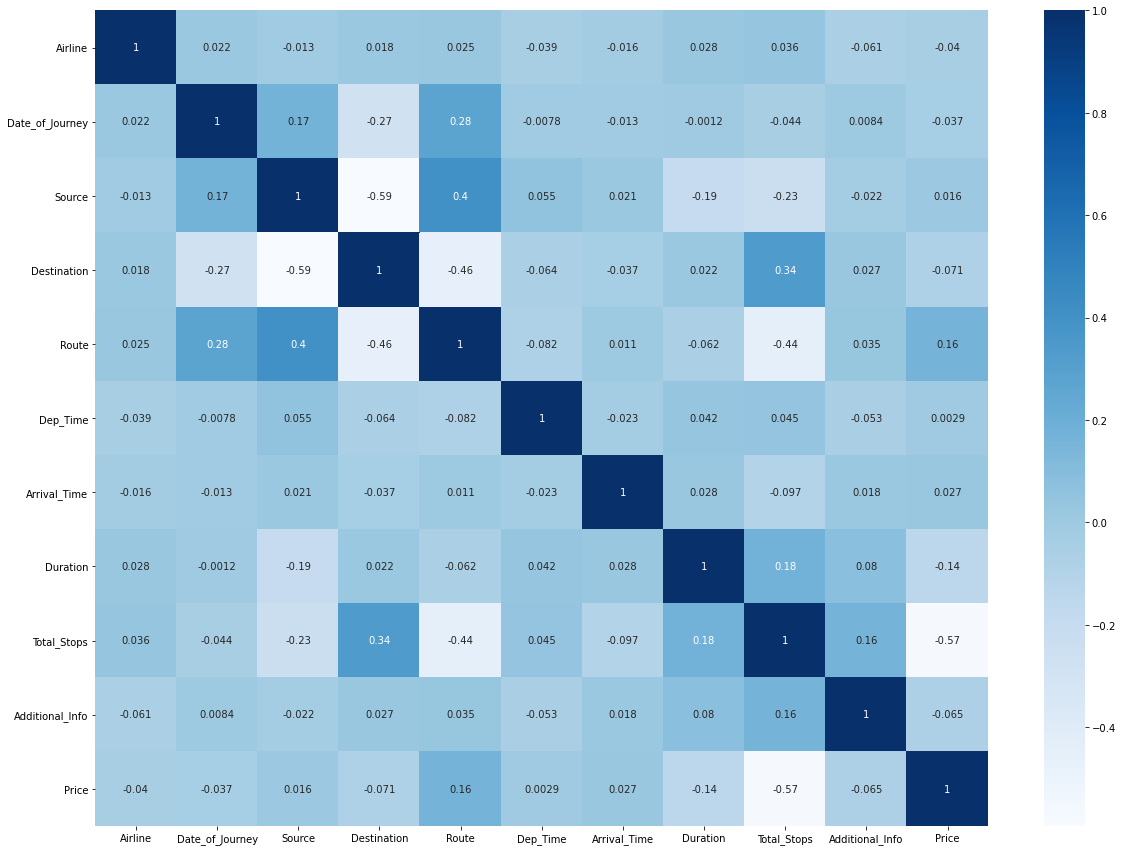

In [23]:
corr_mat=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat,annot=True,cmap='Blues')
plt.show()

In [24]:
corr_mat['Price'].sort_values(ascending=False)

Price              1.000000
Route              0.164118
Arrival_Time       0.027377
Source             0.015998
Dep_Time           0.002949
Date_of_Journey   -0.036942
Airline           -0.039520
Additional_Info   -0.065478
Destination       -0.071112
Duration          -0.144270
Total_Stops       -0.571174
Name: Price, dtype: float64

we can see the Route is positively corelated with output column where Toatl_stops are negatively corelated.
as it is not close to -1 hence we will drop this columns as our output is incremental and will use Linear regression as well.

In [25]:
df.drop(columns=['Total_Stops'],axis=1,inplace=True)

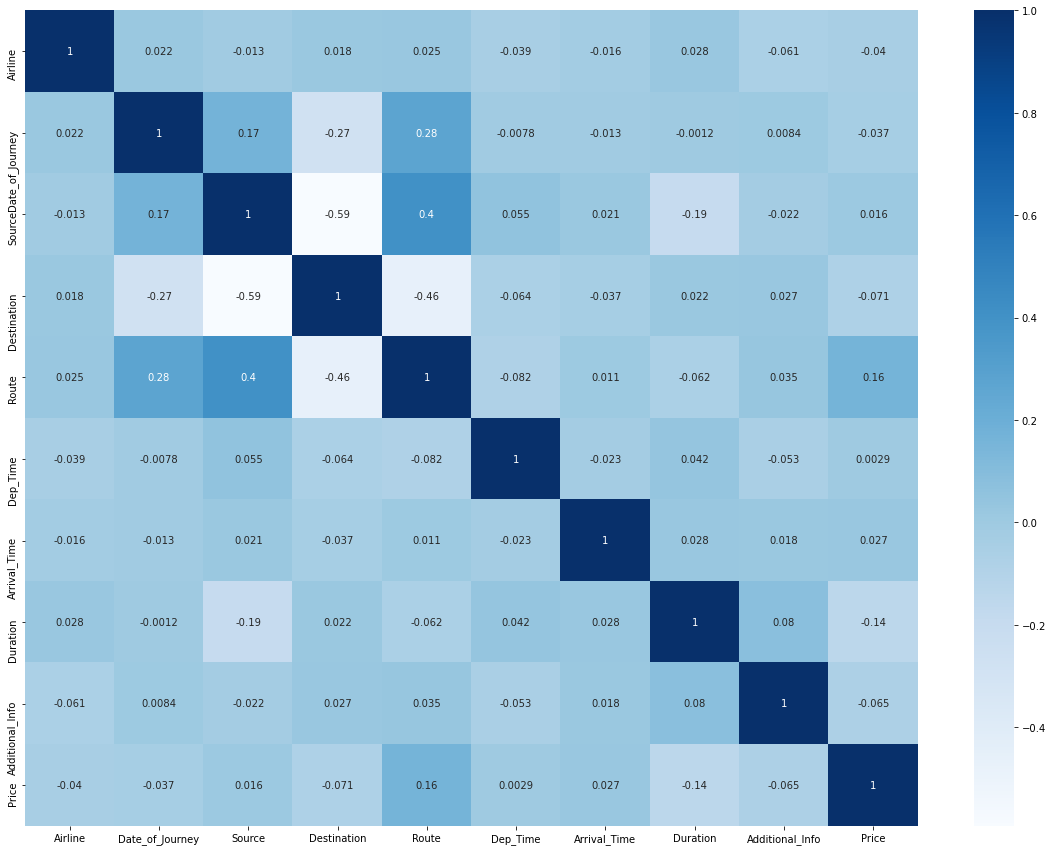

In [26]:
corr_mat=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat,annot=True,cmap='Blues')
plt.show()

The duration column is near to zero with negative corelation hence we will not drop this column

# Normal distribution

checking normal distribution for skewness and outliers

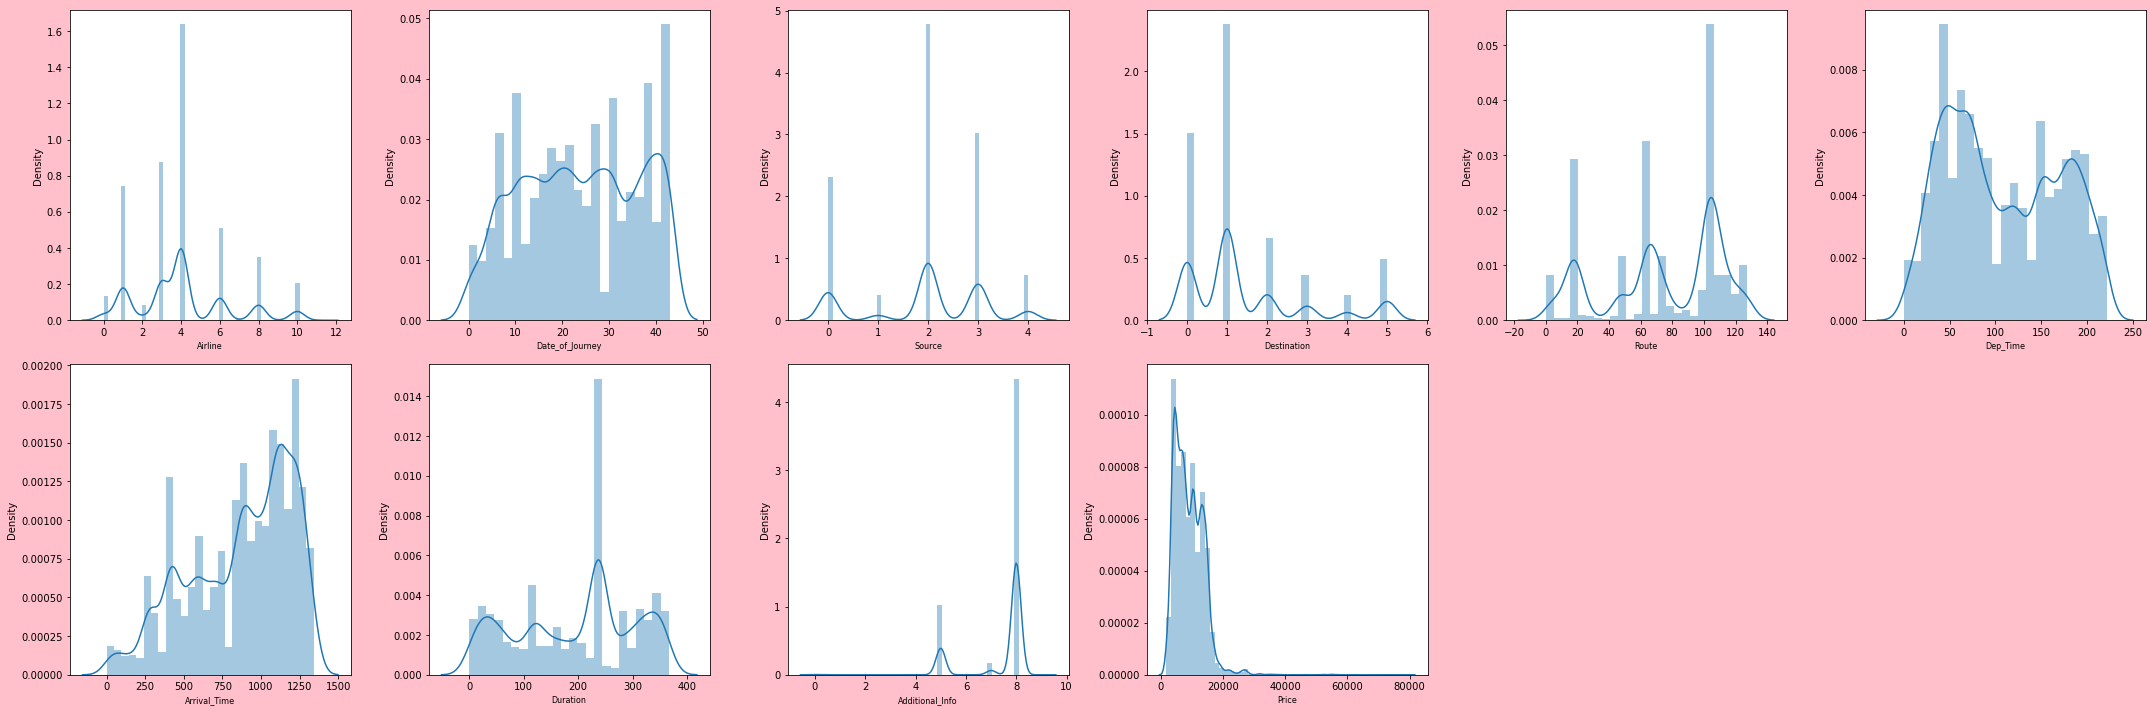

In [31]:
# checking wether te data is normally distributed or not!!!!!!!!!!!!
plt.figure(figsize=(30,10),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(2,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()

The data is skewed

# Checking and Handling Outliers

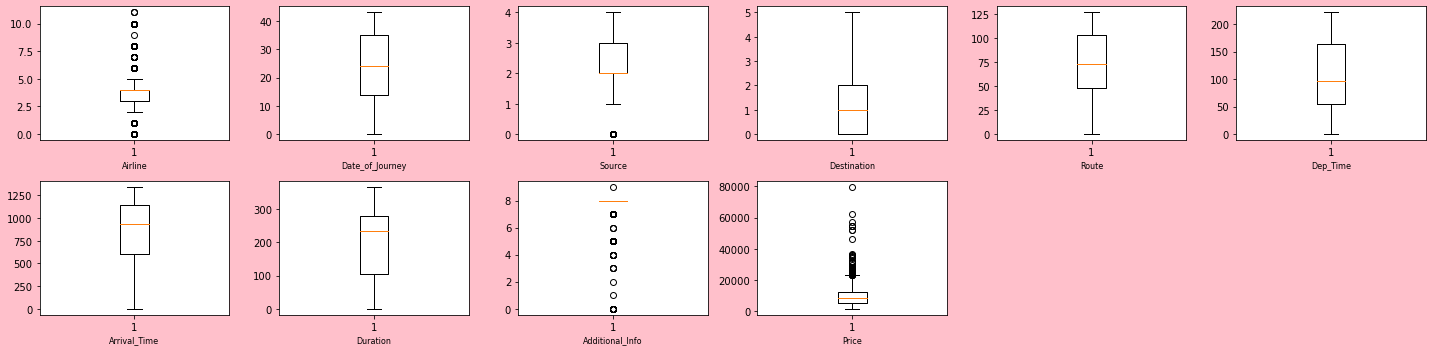

In [34]:
plt.figure(figsize=(20,5),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(2,6,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()

here we can see the airline,source, additional info columns are having outliers hence we will use Z score method to check and remove outliers

# Removing outliers by zscore method

In [35]:
from scipy.stats import zscore

In [36]:
z=np.abs(zscore(df))
z

array([[0.41067545, 0.02147223, 1.65844074, ..., 0.42287466, 0.49989167,
        1.12554821],
       [1.26099927, 1.4375315 , 0.89005213, ..., 1.30672664, 0.49989167,
        0.30904789],
       [0.01448647, 1.56153172, 0.04055451, ..., 0.81083539, 0.49989167,
        1.03985835],
       ...,
       [0.01448647, 0.42675104, 1.65844074, ..., 0.79114632, 0.49989167,
        0.40295085],
       [2.56545795, 1.92386608, 1.65844074, ..., 0.40446108, 0.49989167,
        0.77224576],
       [1.26099927, 1.48047596, 0.04055451, ..., 1.40800134, 0.49989167,
        0.57815073]])

In [37]:
threshold=3
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
         826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
        1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
        2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
        2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
        4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
        5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
        6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
        7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
        8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
        8957,  8990,  9019,  9019,  9193,  9239,  9632,  9657,  9715,
        9974, 10052, 10113, 10160, 10182, 10189, 10353, 10364, 10364,
       10383, 10439, 10511, 10511], dtype=int64), array([9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9,

In [38]:
df1=df[(z<3).all(axis=1)]
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price
0,3,24,0,5,18,211,233,240,8,3897
1,1,6,3,0,84,31,906,336,8,7662
2,4,43,2,1,118,70,413,106,8,13882
3,3,10,3,0,91,164,1324,311,8,6218
4,3,0,0,5,29,149,1237,303,8,13302
...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,64,183,1259,236,8,4107
10679,1,29,3,0,64,193,1305,237,8,4145
10680,4,29,0,2,18,58,824,280,8,7229
10681,10,0,0,5,18,92,938,238,8,12648


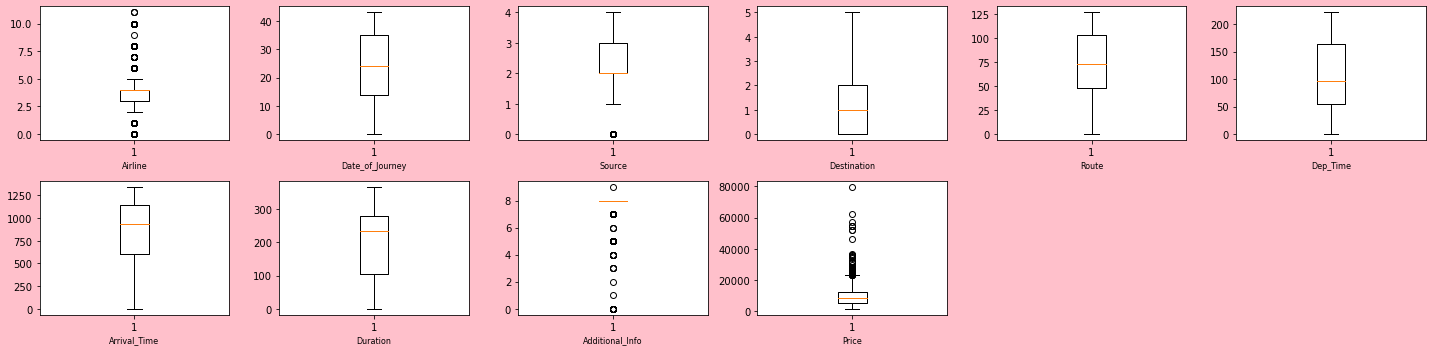

In [39]:
plt.figure(figsize=(20,5),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(2,6,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()

we can see outlier is still present but we cant use Z score twice as to avoid Data loss

# checking outliers with percentile technique

In [40]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info', 'Price'],
      dtype='object')

In [41]:
df1['Airline'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0     0.0
0.1     1.0
0.2     2.0
0.3     3.0
0.4     3.0
0.5     4.0
0.6     4.0
0.7     4.0
0.8     6.0
0.9     8.0
1.0    11.0
Name: Airline, dtype: float64

here we can see the diff in each quantile is around 1 or 2 but 90th and 100th quantile is having diff of 3 hence some outlier is present.

In [42]:
df1['Date_of_Journey'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0     0.0
0.1     7.0
0.2    11.0
0.3    15.0
0.4    20.0
0.5    24.0
0.6    28.0
0.7    32.0
0.8    37.0
0.9    41.0
1.0    43.0
Name: Date_of_Journey, dtype: float64

here we can see the diff in each quantile is almost same hence not outlier is present

In [44]:
df1['Source'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0    0.0
0.1    0.0
0.2    0.4
0.3    2.0
0.4    2.0
0.5    2.0
0.6    2.0
0.7    3.0
0.8    3.0
0.9    3.0
1.0    4.0
Name: Source, dtype: float64

herewe can see small amount of outlier is present on starting quatiles

In [45]:
df1['Additional_Info'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0    4.0
0.1    5.0
0.2    7.0
0.3    8.0
0.4    8.0
0.5    8.0
0.6    8.0
0.7    8.0
0.8    8.0
0.9    8.0
1.0    9.0
Name: Additional_Info, dtype: float64

we can see on starting we have diff in 0th,1st and 2nd quatile hence small amount of outliers are present

# checking and Handling skewness

In [46]:
X=df1.drop('Price',axis=1)
y=df1.Price

In [47]:
X.shape

(10578, 9)

In [48]:
y.shape

(10578,)

In [49]:
X.skew().sort_values(ascending=False)

Destination        1.269454
Airline            0.731709
Dep_Time           0.194141
Date_of_Journey   -0.061918
Duration          -0.216095
Source            -0.439204
Route             -0.511368
Arrival_Time      -0.608273
Additional_Info   -1.533587
dtype: float64

we have some skewness present in Destination, Airline, Route, Arrival_time, Additional_Info as it is not in range of +-0.5

# Using power_tranform method 

In [50]:
from sklearn.preprocessing import power_transform

In [51]:
x_new=power_transform(X)

In [52]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

3    0.040863
0   -0.015590
5   -0.150696
1   -0.214275
2   -0.234422
6   -0.382489
7   -0.391174
4   -0.437329
8   -1.363711
dtype: float64

In [54]:
pd.DataFrame(x_new,columns=X.columns).skew().sort_values(ascending=False) # assigning columns from X

Destination        0.040863
Airline           -0.015590
Dep_Time          -0.150696
Date_of_Journey   -0.214275
Source            -0.234422
Arrival_Time      -0.382489
Duration          -0.391174
Route             -0.437329
Additional_Info   -1.363711
dtype: float64

In [55]:
x=pd.DataFrame(x_new,columns=X.columns)

In [56]:
x.skew().sort_values(ascending=False)

Destination        0.040863
Airline           -0.015590
Dep_Time          -0.150696
Date_of_Journey   -0.214275
Source            -0.234422
Arrival_Time      -0.382489
Duration          -0.391174
Route             -0.437329
Additional_Info   -1.363711
dtype: float64

here we can see the Additional Info column is still having skewness hence we will try to use BoxCox method

# BOXCOX Method

[]

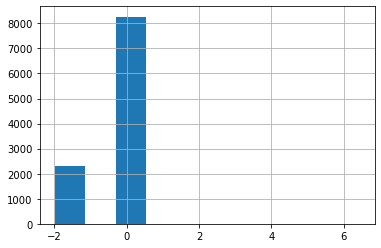

In [58]:
x['Additional_Info'].hist().plot()

we can see the data is negative hence BOX COX method will work here

# Checking Multicolinearity with VIF

In [61]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature']=x.columns
vif.sort_values(by='vif',ascending=False)

,vif,feature
2,1.720346,Source
3,1.653160,Destination
4,1.202818,Route
1,1.084300,Date_of_Journey
7,1.061707,Duration
8,1.047857,Additional_Info
0,1.038650,Airline
5,1.034570,Dep_Time
6,1.008096,Arrival_Time


we can see all columns are in range of VIF i.e Not Greter tha 5 hence we will not drop any column

# Model Prediction

In [66]:
#To get best Test size number from 1 to 40%
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.09933951519499473 Random state 0.1
accuracy 0.10687730557528774 Random state 0.11
accuracy 0.13672492940138348 Random state 0.12
accuracy 0.15330521194336344 Random state 0.15
accuracy 0.15583713207074879 Random state 0.21
accuracy 0.15820146608361152 Random state 0.38
Best accuracy is 15.820146608361153 on Random state 0.38


In [67]:
maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.38,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.13912455250898714 Random state 1
accuracy 0.1392398814952367 Random state 8
accuracy 0.14425757086939472 Random state 13
accuracy 0.1501097056784061 Random state 44
accuracy 0.1511097973383878 Random state 65
accuracy 0.15147649138827357 Random state 106
accuracy 0.15426808008846216 Random state 171
accuracy 0.15483801693516874 Random state 248
Best accuracy is 15.483801693516874 on Random state 248


In [68]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.36,random_state=248)
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=lr.score(x_test,y_test)


#print("predicted values",pred)
#print("predicted values",y_test)
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(15.655710501571873, 3070.5629664323624, 3680.603965363544)

Linear Regression is having 15.65% accuracy which is not good

# Decision Tree Regressor

In [69]:
#finding best testsize 
from sklearn.tree import DecisionTreeRegressor

maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8624921733431136 Random state 0.1
accuracy 0.8662214574800247 Random state 0.12
Best accuracy is 86.62214574800247 on Random state 0.12


In [71]:
#finding best random state
maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.12,random_state=i) #12 - 77.41
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.8574800879228173 Random state 1
accuracy 0.8708480393908755 Random state 12
accuracy 0.874560410170834 Random state 107
accuracy 0.8802310923419552 Random state 175
Best accuracy is 88.02310923419552 on Random state 175


In [72]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.12,random_state=175) 
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc=dt.score(x_test,y_test)


#print("predicted values",pred)
#print("predicted values",y_test)
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(87.34786692863699, 687.9665354330708, 1437.2934434959811)

Accuracy for Decision Tree is 87.34% which is good

# Random forest Algorithm

In [73]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

#finding best testsize 
from sklearn.ensemble import RandomForestRegressor 

maxAcc = 0
maxRs=0

for i in range(9,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.9224253248909153 Random state 0.09
Best accuracy is 92.24253248909153 on Random state 0.09


In [ ]:
#finding best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.09,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

In [91]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.09,random_state=175) #93.02
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=rf.score(x_test,y_test)
pred_f=y_test


#print("predicted values",pred)
#print("predicted values",y_test)
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(91.93514023741854, 624.7405360640583, 1142.2850874835513)

The final accuracy for random forest is 91.93% whci is good

# Knneighborsregressor

In [88]:

from sklearn.neighbors import KNeighborsRegressor

maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=i1)
    knr=KNeighborsRegressor()
    knr.fit(x_train,y_train)
    pred=knr.predict(x_test)
    acc=knr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7197136465978284 Random state 0.1
accuracy 0.7225829833749307 Random state 0.11
accuracy 0.7483724797638123 Random state 0.12
Best accuracy is 74.83724797638122 on Random state 0.12


In [90]:
#finding best random state
maxAcc = 0
maxRs=0

for i in range(1,400):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.12,random_state=i) 
    knr=KNeighborsRegressor()
    knr.fit(x_train,y_train)
    pred=knr.predict(x_test)
    acc=knr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.770120986531857 Random state 1
accuracy 0.7904615174382355 Random state 2
accuracy 0.7908744287761011 Random state 104
Best accuracy is 79.08744287761012 on Random state 104


In [93]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.12,random_state=104) 
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
acc=knr.score(x_test,y_test)
pred_f=y_test


#print("predicted values",pred)
#print("predicted values",y_test)
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(79.08744287761012, 1253.9045669291338, 1845.3537064875243)

The accuracy for KNN is 79.08% which is ok 

we have best accuracy for Ramdom Forest hence we will cross validate all model to select best prediction

# Checking cross validation for all algorithms

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
#linear regression
scr=cross_val_score(lr,x,y)
print('cross validation score',scr.mean())

cross validation score 0.132008652398098


In [97]:
#desicion treeregressor
scr=cross_val_score(dt,x,y)
print('cross validation score',scr.mean())

cross validation score 0.8301999943127901


In [98]:
#random forest regressor
scr=cross_val_score(rf,x,y)
print('cross validation score',scr.mean())

cross validation score 0.892258048452053


In [99]:
#Knregressor
scr=cross_val_score(knr,x,y)
print('cross validation score',scr.mean())

cross validation score 0.7299679668812549


# Final conclusion : Random Forest is having Highest Accuracy i.e. 89.22%

hence we will use Hyper parameter tunning to run model on mutilple parameter and will select the best combination for model to predict highest and most accurate prediction

# Using hyperparameter tunning

In [101]:
from sklearn.model_selection import GridSearchCV
clf = RandomForestRegressor()

params={'max_features':['auto','sqrt','log2'],
       'max_depth':[10,15],
       'criterion':['mae','mse'],
        'n_estimators':[5,10,15]
       }


grd=GridSearchCV(clf,param_grid=params,cv=5,scoring='accuracy')
grd.fit(x_train,y_train)
print('best_params:',grd.best_params_)
grd=grd.best_estimator_
grd.fit(x_train,y_train)
y_pred=grd.predict(x_test)
print(r2_score(y_test,y_pred))

best_params: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 5}
0.8268390992244804


# Random Forest Algorithm with best parameter selection

In [104]:
#from sklearn.ensemble import RandomForestClassifier 

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.09,random_state=175) 
rf2=RandomForestRegressor(criterion= 'mae', max_depth= 10, max_features= 'auto',n_estimators=5)
rf2=RandomForestRegressor()
rf2.fit(x_train,y_train)
pred=rf2.predict(x_test)
acc=rf2.score(x_test,y_test)
pred_f=y_test
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(91.8916513786102, 627.9577813837673, 1145.3607693502363)

# Plot AUC ROC Graph

In [106]:
y_pred=rf2.predict(x_test)

In [109]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [112]:
y_pred_prob=rf2.predict(x_test)

In [113]:
y_pred_prob

array([ 4559.62      , 12114.32      ,  7578.30438889,  7184.3       ,
        3734.03      ,  8629.34      ,  8529.41      ,  7756.56      ,
        9376.95      ,  4882.16      , 12464.43333333, 10723.89      ,
        8012.06      ,  9263.69      ,  7832.        , 10862.7       ,
        6013.79      ,  5038.65      , 14965.835     , 15403.5575    ,
        8795.76      ,  4214.52      , 13480.68      ,  8408.2       ,
        6001.83      , 13371.54      ,  6061.49      , 14369.51      ,
       12597.27      , 14041.04      ,  4033.24      , 12353.15      ,
       14925.82      ,  9177.245     ,  7307.7       ,  5061.44      ,
        6084.99      ,  9875.19      , 15339.        , 10386.69      ,
        8353.87      , 15434.12666667,  7289.34      ,  4571.74      ,
       11643.75      , 13309.49      ,  5034.88      ,  8619.84      ,
        6441.51      ,  4784.19      , 10859.07      ,  9146.92      ,
        7064.        , 13040.89      , 13797.37      ,  3374.45      ,
      

In [ ]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred)

Here we can see multiclass is not supported and AUC ROC curve mainly used to see classification score in graphical represenatation

# Saving the model in pickel format

In [117]:
import joblib
joblib.dump(r2_score(y_test, pred)*100,"AirPrice.pk1")

['AirPrice.pk1']

# Testing Model with Future Data for Output columns

In [118]:
x.iloc[1]

Airline           -1.418107
Date_of_Journey   -1.519284
Source             0.897016
Destination       -1.367088
Route              0.214536
Dep_Time          -1.355825
Arrival_Time       0.040704
Duration           1.242483
Additional_Info    0.524414
Name: 1, dtype: float64

In [119]:
y.iloc[1]

7662

In [120]:
t=np.array([-1.418107,-1.519284,0.897016,-1.367088,0.214536,-1.355825,0.040704,1.242483,0.524414])

In [121]:

t.shape

(9,)

In [122]:
x_train.shape

(9625, 9)

In [123]:
t=t.reshape(1,-1)
t.shape

(1, 9)

In [124]:
rf2.predict(t) # selecting final model 

array([7418.72])

Here we can see that the actual output and predicted output are nrealy same i.e.

Actual output =7662
Prediction= 7418.72

Hence we can say that the Model is prediction well